A complete analysis on Dota 2 hero Magnus

Yizhou Li

Dota 2 (Defense of the Ancients 2) was designed by IceFrog and published by Valve in 2013. It was originally a game mode for Blizzard Entertainment's Warcraft III: Reign of Chaos. It was one of the greatest video games in all times, and it was rated high by IGN: 9.4/10, GameSpot: 9/10, etc. As I was writting this document in May 2 2022 7:00 pm, there were still around 361,449 players playing this game.

<img src="steam_stats.png" width="800" height="400">

Dota 2 is a type of MOBA (multiplayer online battle arena) game. There are two sides in Dota 2, one is called Dire, which always appeared at upper right corner of the map. The other is called Radiant, which always appeared at lower left corner of the map. There are 10 player in total, and they will be randomly assigned as 5 players in Dire and 5 players in Radiant. Before the match started, players need to pick a hero to control. Generally, heroes are classified by role of carry, mid, tank, support. In order to win the game, players should have all these roles in their teams and cooperate with each other. Although sometimes players can win with only one or two roles in their teams, the best practices of winning the game is to have all of these roles. Heores can have the same roles, but each heroes are unique. For example, they have unique skills, damage, health, strong periods, etc. After picking a hero, the players will see a map like this:

<img src="map.png" width="800" height="400">

As the map shows, there are three roads leading to opposite team's base. Every 30 seconds, creeps spawn in both team's base, and follow the three routes to attack. Players can choose one route, and follow creeps to attack the other team. However, the enemy heroes controlled by enemy team, creeps and defense towers will slow down the pace of attacking. To destroy enemy team's base, you have to use the strength of your hero, and try to kill enemy players and creeps to accumulate experience and gold. More experience and gold will solidify your skills, and allow you to purchase more pwerful items at your base. In the end, one team will destroy the other team's base, and the game is over.

As a pro Dota player with 1500h+ play time and 5 years game experience, I am deeply interested in heroes' gameplay strategy, lineup matching, and winning percentage against different heroes. Recently, I paid special attention to Magnus, which is a hero charactrized by high strength, able to hardly lock down enemy heroes, and an great initiator. Why do I analyze this hero? It's because in TI 10 (The International is the biggest annual event hosted by Valve. It gathers top ranking Dota teams around the world to compete in this championship, and it has total prize pool of 40 million dollars funded by Dota 2 comunity) final match PSG.LGD vs Team Spirit, Magnus was picked 4 times, and there were only 5 matches in total. So many great and decisive moments were created as Magnus played by Team Spirit. It's the Magnus' long lasting ulitimate and blink dagger pushing enemies back made Team Spirit chamipion of the Ti10.

<img src="Dota2_TI10_Magnus.jpeg" width="800" height="400">

<img src="Screen Shot 2022-05-03 at 5.32.06 PM.png" width="800" height="400">

Dota 2 official site: https://www.dota2.com/home
Dota 2 Steam store site: https://store.steampowered.com/app/570/Dota_2/
Dota 2 Wikipedia: https://en.wikipedia.org/wiki/Dota_2
Dota 2 Reddit: https://www.reddit.com/r/DotA2/
Introduction of Magnus: https://dota2.fandom.com/wiki/Magnus

Now, let's begin analysing. We want to know in recent matches what's the general win rate of Magnus in different ranks? Comparing to other heroes, how good was Magnus?

In [106]:
# To gather related data, we use opendota api (a api famous for statistical analysis in Dota 2)
# and python requests to get the data back.
# opendota link: https://www.opendota.com/
# api docs: https://docs.opendota.com/

# We use requests to make api call; json library to parse returned json objects
# ; pandas dataframe to store and procees the info.
import requests
import json
import pandas as pd

# A funtion to call api, and return the organized pandas dataframe
def call_api_and_make_a_df(link):
    r = requests.get(link)
    data = json.loads(r.text)
    df = pd.DataFrame(data)
    return df

df = call_api_and_make_a_df("https://api.opendota.com/api/heroStats")

# Clean and reformat the dataframe, so we only see data related to our task.
df = df[["localized_name", "1_pick", "1_win", "2_pick", "2_win", "3_pick", "3_win", "4_pick", "4_win",
"5_pick", "5_win", "6_pick", "6_win", "7_pick", "7_win", "8_pick", "8_win"]]

# Rename ranking
df = df.rename(columns={"localized_name":"Heroes", "1_pick":"Herald picks", "1_win":"Herald wins",
                        "2_pick":"Guardian picks", "2_win":"Guardian wins", "3_pick":"Crusader picks",
                        "3_win":"Crusader wins", "4_pick":"Archon picks", "4_win":"Archon wins",
                        "5_pick":"Legend picks", "5_win":"Legend wins", "6_pick":"Ancient picks",
                        "6_win":"Ancient wins", "7_pick":"Divine picks", "7_win":"Divine wins",
                        "8_pick":"Immortal picks", "8_win":"Immortal wins"})
all_hero_wp_df = df.copy()
magnus_df = all_hero_wp_df[all_hero_wp_df["Heroes"] == "Magnus"]
magnus_df.reset_index(inplace=True, drop=True)
magnus_df.head()

,Heroes,Herald picks,Herald wins,Guardian picks,Guardian wins,Crusader picks,Crusader wins,Archon picks,Archon wins,Legend picks,Legend wins,Ancient picks,Ancient wins,Divine picks,Divine wins,Immortal picks,Immortal wins
0,Magnus,8217,3752,18821,8713,27089,12903,24394,11527,14572,7045,6809,3350,3111,1484,958,451


Generally speaking, players with Herald, Guardian, or Crusader titles are newbies. Players with Archon, Legend, or Ancient titles are medium players. Players with Divine or Immortal titles are pro players. Next, we will calculate the win rate of Magnus in different player rankings, and plot a few graphs to visualize the results.

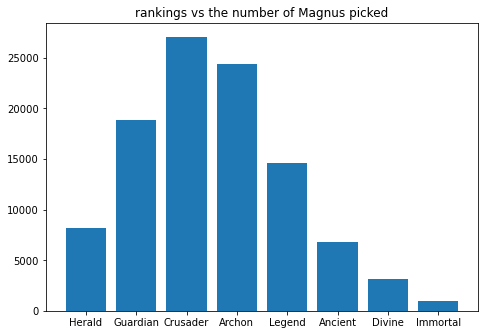

In [107]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranks = ['Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal']
v = [magnus_df.at[0, "Herald picks"], magnus_df.at[0, "Guardian picks"], magnus_df.at[0, "Crusader picks"],
     magnus_df.at[0, "Archon picks"], magnus_df.at[0, "Legend picks"], magnus_df.at[0, "Ancient picks"],
     magnus_df.at[0, "Divine picks"], magnus_df.at[0, "Immortal picks"]]
ax.bar(ranks,v)
ax.set_title("rankings vs the number of Magnus picked")
plt.show()

Wait! Do people in Crusader pick Magnus the most simply because most of the Dota 2 players are concentrated in Crusader? To find out, I have to use opendota api to get the players' distribution in realtimes. However, I didn't find a api call for this, so for the sake of simplacity, I screen shooted Dota 2 players' distribution. Although I didn't do this in script, for most of the time, I think this does reflect the players' distribution in all time.

<img src="Screen Shot 2022-05-03 at 7.59.35 PM.png" width="800" height="400">

As you see, most of the players are concentrated in Archon, but players in Crusader has most of the Magnus picked. So the first conclusion we have is people love to play Magnus in Crusader. Now, let's explore the win rate of picking Magnus in different ranks.

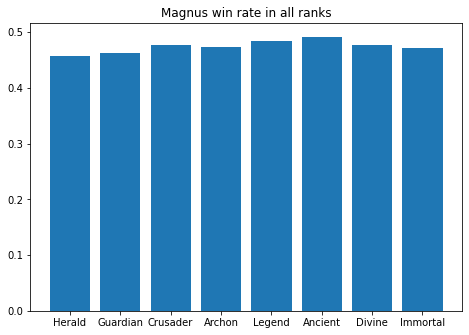

Showing top wining heroes in all ranks:

Herald
Axe 0.5667719811975033
Silencer 0.5526269680358439
Sand King 0.5521048336773389
Necrophos 0.5445010323468685
Jakiro 0.5429471746211585


Guardian
Axe 0.5544287148246859
Silencer 0.5422870123715047
Sand King 0.5415933515605966
Undying 0.5399459846263936
Juggernaut 0.5397120027842631


Crusader
Axe 0.5453662842012357
Juggernaut 0.5450803398893507
Meepo 0.5435347628330085
Huskar 0.5423975819074863
Omniknight 0.5371195819243775


Archon
Huskar 0.552735457063712
Juggernaut 0.5491487653410674
Omniknight 0.5483439277350285
Arc Warden 0.5408438545376065
Sand King 0.5396637518720712


Legend
Huskar 0.5619187757504415
Arc Warden 0.5526544821583986
Omniknight 0.5517493599902474
Visage 0.5466919911364356
Juggernaut 0.5465274757140786


Ancient
Arc Warden 0.5636128196827452
Primal Beast 0.5496161089381428
Huskar 0.5477183367091624
Visage 0.5473530840213696
Pugna 0.5461288827074641


Divine
Omniknight 0.558679706601467
Visage 0.556343019135365
Primal B

In [108]:
# draw magnus win rate in all ranks
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranks = ['Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal']
v = [magnus_df.at[0, "Herald wins"]/magnus_df.at[0, "Herald picks"],
     magnus_df.at[0, "Guardian wins"]/magnus_df.at[0, "Guardian picks"],
     magnus_df.at[0, "Crusader wins"]/magnus_df.at[0, "Crusader picks"],
     magnus_df.at[0, "Archon wins"]/magnus_df.at[0, "Archon picks"],
     magnus_df.at[0, "Legend wins"]/magnus_df.at[0, "Legend picks"],
     magnus_df.at[0, "Ancient wins"]/magnus_df.at[0, "Ancient picks"],
     magnus_df.at[0, "Divine wins"]/magnus_df.at[0, "Divine picks"],
     magnus_df.at[0, "Immortal wins"]/magnus_df.at[0, "Immortal picks"]]
ax.bar(ranks, v)
ax.set_title("Magnus win rate in all ranks")
plt.show()

# calculate win rate for all heroes across ranks
ranks = ['Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal']
for r in ranks:
     all_hero_wp_df[r + " win rate"] = all_hero_wp_df[r + " wins"] / all_hero_wp_df[r + " picks"]

print("Showing top wining heroes in all ranks:\n")
for r in ranks:
     all_hero_wp_df = all_hero_wp_df.sort_values(by=r+' win rate', ascending=False)
     print(r)
     for i, row in all_hero_wp_df.head().iterrows():
          print(row["Heroes"], row[r + " win rate"])
     print("\n")

As illustrated in the graph above, Magnus has relatively high win rate in Legend rank, which is around 0.45. However, no matter which rank you are in, the top heros' win rate are around 0.55. Maybe Magnus is shining in a big championship like TI, but it's really not good enough for a regular public match. Thus, be careful to pick Magnus, as you might want to punch the monitor, throw away the keyboard, and scream and yell after you lose the game.

A pro tip: If you play Dota 2, don't feel too struggle with in-game techniques. Just pick the top winning heroes or the heroes that counter enemy the most. 

Now let's examine some meta information about Magnus. In addition, we will try to discover which heroes Magnus is good to cooperate or against.

In [109]:
df = call_api_and_make_a_df("https://api.opendota.com/api/heroes")

heros_df = df.copy()
df = df[df["localized_name"] == "Magnus"]
df.head()

,id,name,localized_name,primary_attr,attack_type,roles,legs
95,97,npc_dota_hero_magnataur,Magnus,str,Melee,"[Initiator, Disabler, Nuker, Escape]",4


In [110]:
df = call_api_and_make_a_df("https://api.opendota.com/api/heroes/97/matchups")

print(df.head())

# At this point, we use hero names instead of hero ID, and we will calculate win rate of Magnus against other
# heros, and list the top 5 of them.
df["win rate"] = df["wins"]/df["games_played"]
df = df.sort_values(by='win rate', ascending=False).head()

print(df)

   hero_id  games_played  wins
0      129           290   146
1       86           197    89
2       26           189    98
3      121           168    87
4      128           167    99
     hero_id  games_played  wins  win rate
118       80             6     5  0.833333
112        5            10     8  0.800000
111       50            11     8  0.727273
89        14            31    21  0.677419
114       30             9     6  0.666667


In [111]:
for i, r in df.iterrows():
    print(heros_df[heros_df["id"] == r["hero_id"]].get(["localized_name"]))

   localized_name
78     Lone Druid
   localized_name
4  Crystal Maiden
   localized_name
48         Dazzle
   localized_name
13          Pudge
   localized_name
28   Witch Doctor


It's clear that in current patch, Magnus is best to counter the heroes listed above. Apart from heroes that Magnus counters, we can also see who plays Magnus the most in recent times.

In [112]:
# Players info
df = call_api_and_make_a_df('https://api.opendota.com/api/heroes/97/players')
print(df.head())

   account_id  games_played  wins
0   228392819           162   105
1    96169991           122    64
2    41231571           118    82
3    70388657           114    68
4    88271237            60    39


Well, the api document of opendota says there will be responses such as steamid, avatar, personaname, last_login, full_history_time, country_code, fantasy_role, is_pro, etc return. Nevertheless, we can only see account_id right now. I guess they didn't make all functionalities as the document described. Therefore, we cannot see magnus players' info by scripts. If you are interested in pro Magnus players, you can always head to the link: https://master--opendota-staging.netlify.app/heroes/97/players, and see the results in realtime.

I am curious about the item builds of Magnus across different ranks. So, let's explore that.

In [113]:
# Querying the popular items info
df = call_api_and_make_a_df('https://api.opendota.com/api/heroes/97/itemPopularity')
print(df.head())

    start_game_items  early_game_items  mid_game_items  late_game_items
11              72.0               NaN             NaN              NaN
12              12.0               NaN             NaN              NaN
13              78.0               NaN             NaN              NaN
14               2.0               NaN             NaN              NaN
16             148.0               NaN             NaN              NaN


Sadly, the api does not provide specific Magnus' popular items build. It only shows the number of items bought in different game periods. Further, it's hard to tell how many games a single row represents. Although, the api doesn't work, we can still find out the popular items build of Magnus manully by clicking the link: https://master--opendota-staging.netlify.app/heroes/97/items in web browser.

In conclusion, as I research statistics about Magnus, I found out lots of good resources such as Dota buff, opendota, datdota, Dota 2 official website, etc. However, only opendota has clear and well documented api to use, rather than just telling you the results on the web, or vague description about the api usage. Therefore, if you want to do Dota 2 analysis, opendota can be your best choice. You can find information about players, matches, heroes, etc in Dota 2. Although opendota did a great job on providing information, it doesn't has more detailed information such as how many times Roshan (a powerful neutral creep in the game) get killed in a game? Or, where did experiences or gold of a hero get? If you want detailed information like this, you will have to collect by yourself, and make it into csv or json to analyse later. 

Apart from the data sources, we can clearly understand the Magnus as a notorious initiator, gankers, and had shocked the Dota 2 fans in TI 10 is not strong. It is only powerful when you have good team mates, and they are willing to assist you. Other than that don't pick him, don't even practice him. Pick heroes such as Juggernaut, Tiny, Chaos Knnight who has high win rate in current patch and can carry the game without the team mates. 